 lsoda--  at t (=r1) and step size h (=r2), the      
       corrector convergence failed repeatedly       
       or with abs(h) = hmin    l
      in above,  r1 =  0.8138030101335D-04   r2 =  0.2899842950380D+00


/home/mkeriy/.local/lib/python3.10/site-packages/scipy/integrate/_odepack_py.py:247: ODEintWarning: Repeated convergence failures (perhaps bad Jacobian or tolerances). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


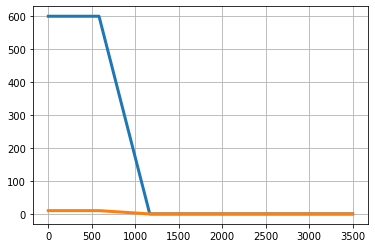

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

#constants
muT = 0.005
muTi = 0.25
kS = 0.0005
kV = 0.0062
lambda1 = 0.025
lambda2 = 0.25
lambda3 = 0.8
Gs = 41.2
C = 47.0
C_i = 47.0
B = 2.0
Bs = 13.8
S1 = 4.0
S2 = 2.8

         
# функция правых частей системы ОДУ
def f(y, t):  #  имеется дополнительный аргумент k
         T, Ts, V  = y
         S = S1 - S2 * V / (Bs - V)
         lam1 = lambda1 / (C + V)
         lam2 = lambda2 / (C_i + V)
         lam3 = lambda3 / (C_i + V)
         G = Gs * V / (B + V)
         return np.array([S - muT * T + lam1 * T * V - kS * V * T, kS * V * T - muTi * Ts - lam2 * Ts * V, lam3 * Ts * V - kV * T * V + G]) 


y0 = np.array([600, 0, 10])
t = np.linspace(0, 3500, 7)
res = odeint(f, y0, t, hmin=500)

fig, ax = plt.subplots()
fig.set_facecolor('white')
        
plt.plot(t, res[:,0],linewidth=3)
plt.plot(t, res[:,2],linewidth=3)

plt.grid(True)

    
plt.show()
